<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preços `outliers` de diamante

In [1]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


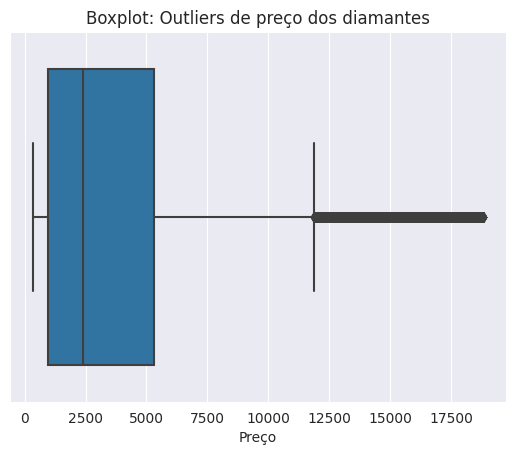

In [2]:
# gráfico do exercício 1

diamonds = data[['price']]
diamonds

with sns.axes_style('darkgrid'):
  grafico_1 = sns.boxplot(x='price',data=diamonds)
  grafico_1.set(title='Boxplot: Outliers de preço dos diamantes',
                xlabel='Preço')

**Insight do gráfico 1**: Existem uma quantidade significativa de outliers neste grupo de diamantes. Segundo o gráfico, valores acima de $12500 já estão sendo considerados outliers

---

## 2\. Correlação entre o do preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [3]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


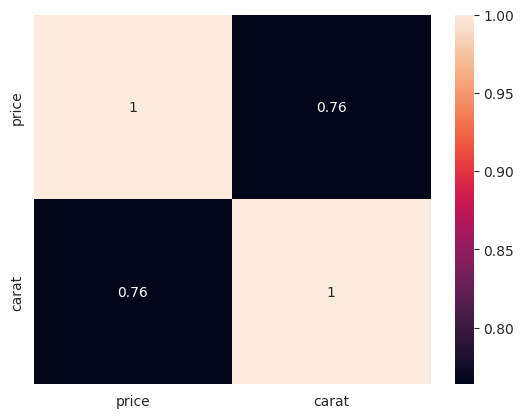

In [4]:
diamonds = data[['price', 'carat', 'clarity']]
diamonds_grouped = diamonds.groupby('clarity').mean().corr()

with sns.axes_style('darkgrid'):
  grafico_2 = sns.heatmap(diamonds_grouped, annot=True)



**Insight do gráfico 2**: Existe uma correlação forte entre  o preço e o peso do diamente. Como se trata de uma correlação positiva, significa que quanto maior o peso do diamante, maior será o preço.

---

## 3\. Distribuição contínua aproximada do peso (`weight`) de carros

In [5]:
import seaborn as sns

data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


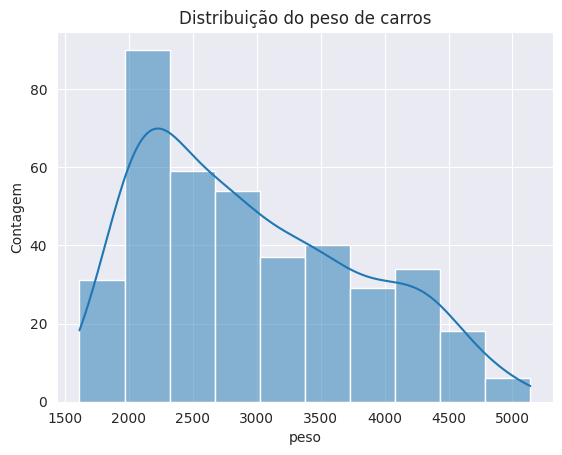

In [7]:
cars = data[['weight']]

with sns.axes_style('darkgrid'):
  grafico_3 = sns.histplot(x='weight',data=cars,kde=True)
  grafico_3.set(title='Distribuição do peso de carros',
                xlabel='peso',
                ylabel='Contagem')

**Insight do gráfico 3**: A distribuição do peso dos carros não segue uma distribuição normal. Além disso, existe uma quantidade de carros de até 3000 u.m. (unidades de medida) muito maior que a quantidade de carros com mais de 4000 u.m.

---